In [1]:
# import libraries
import pandas as pd
from sqlalchemy import create_engine

<a name="table_of_contents"></a> 
**Table of contents**

**Instructions for completing the task**
* Describe the goals of the study.
* Study the tables (print the first rows).
* Make an SQL query for each of the tasks.
* Output the results of each query in the Notebook.
* Describe your conclusions for each of the tasks.

**SQL Project description**  

The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers.
You've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product.

**Project goal** 

To enable a better overview for the startups in the book market for the develop of new apps for book lovers.

**Task**  
* Find the number of books released after January 1, 2000.
* Find the number of user reviews and the average rating for each book.
* Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).
* Identify the author with the highest average book rating: look only at books with at least 50 ratings.
* Find the average number of text reviews among users who rated more than 50 books.


**Short final conclusion**

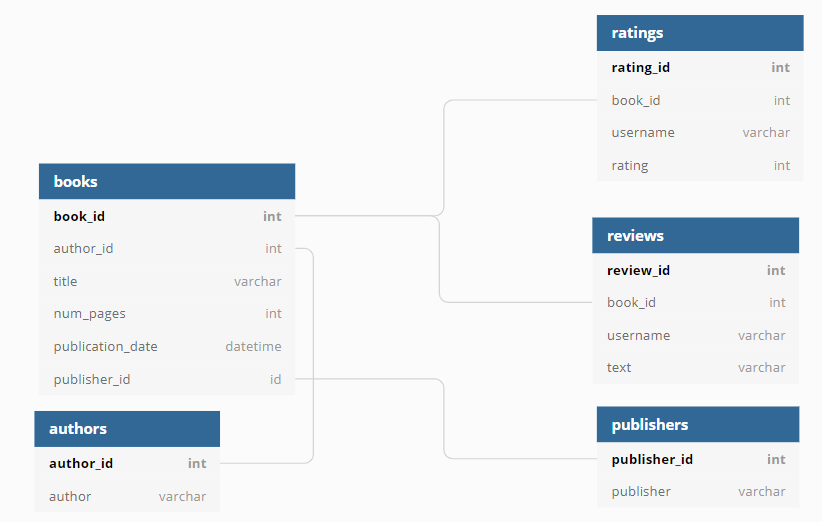

In [2]:
db_config = {'user': 'praktikum_student',# user name
             'pwd': 'Sdf4$2;d-d30pp', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,# connection port
             'db': 'data-analyst-final-project-db'}# the name of the data base

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'})

* Study the tables (print the first rows).

In [3]:
query = ''' SELECT *
    FROM books
            '''
books = pd.io.sql.read_sql(query, con = engine)
print(books.shape)
display(books.head())

(1000, 6)


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [4]:
query = ''' SELECT *
    FROM authors
            '''
authors = pd.io.sql.read_sql(query, con = engine)
print(authors.shape)
display(authors.head())

(636, 2)


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [5]:
query = ''' SELECT *
    FROM publishers
            '''
publishers = pd.io.sql.read_sql(query, con = engine)
print(publishers.shape)
display(publishers.head())

(340, 2)


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [6]:
query = ''' SELECT *
    FROM ratings
            '''
ratings = pd.io.sql.read_sql(query, con = engine)
print(ratings.shape)
display(ratings.head())

(6456, 4)


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [7]:
query = ''' SELECT *
    FROM reviews
            '''
reviews = pd.io.sql.read_sql(query, con = engine)
print(reviews.shape)
display(reviews.head())

(2793, 4)


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


We have 5 different tables that are all linked to books table via the respective identification numbers (the ids).They have all different lengths and have different numbers of columns and are divided into the 5 table names Books, Authors, Publishers, Ratings and Reviews.

+ Find the number of books released after January 1, 2000.

In [8]:
query = ''' SELECT COUNT(*) AS cnt_books
    FROM books
    WHERE publication_date >= '2000-01-01';
            '''
books_released_after_january = pd.io.sql.read_sql(query, con = engine)
books_released_after_january

,cnt_books
0,821


We have a total of 821 books that were published from January 1, 2000 in our list..

+ Find the number of user reviews and the average rating for each book.

In [9]:
query = ''' SELECT COUNT(rating_id) AS number_reviews, AVG(rating) AS avg_rating
    FROM ratings
            '''
n_reviews_avg_rating= pd.io.sql.read_sql(query, con = engine)
n_reviews_avg_rating

,number_reviews,avg_rating
0,6456,3.928284


We have a total of 6456 user reviews and the average rating of 3.9 for each book.

In [10]:
query = ''' SELECT books.title,COUNT(reviews.review_id) AS reviews_cnt, AVG(ratings.rating) AS avg_rating
    FROM books 
    INNER JOIN ratings ON ratings.book_id = books.book_id
    INNER JOIN reviews ON reviews.book_id = books.book_id
    GROUP BY books.title
    ORDER BY reviews_cnt DESC;
            '''
title_n_reviews_avg_rating= pd.io.sql.read_sql(query, con = engine)
title_n_reviews_avg_rating

,title,reviews_cnt,avg_rating
0,Twilight (Twilight #1),1120,3.662500
1,The Hobbit or There and Back Again,528,4.125000
2,The Catcher in the Rye,516,3.825581
3,Harry Potter and the Prisoner of Azkaban (Harr...,492,4.414634
4,Harry Potter and the Chamber of Secrets (Harry...,480,4.287500
...,...,...,...
988,The Adventures of Tom Sawyer and Adventures of...,2,5.000000
989,History of Beauty,2,2.500000
990,Lysistrata,2,4.000000
991,Executive Orders (Jack Ryan #8),2,3.500000


Twilight is the book that has the most reviews with 1120.

+ Identify the publisher that has released the greatest number of books with more than 50 pages (this will help you exclude brochures and similar publications from your analysis).

In [11]:
query = ''' SELECT publishers.publisher AS publisher, books.num_pages AS num_pages 
    FROM books
    INNER JOIN publishers ON publishers.publisher_id = books.publisher_id
    WHERE books.num_pages >=50
    ORDER BY num_pages;
            '''
publisher_more_than_50_pages= pd.io.sql.read_sql(query, con = engine)
publisher_more_than_50_pages

,publisher,num_pages
0,City Lights,56
1,Listening Library (Audio),61
2,HarperCollinsChildren’sBooks,62
3,Random House Books for Young Readers,64
4,Dover Publications,64
...,...,...
987,Andrews McMeel Publishing,1456
988,Penguin Classics,1556
989,Ballantine Books,1728
990,Starfire,2088


In [12]:
query = ''' SELECT COUNT(DISTINCT publishers.publisher_id) AS publisher_id_uniq_cnt 
    FROM books
    INNER JOIN publishers ON publishers.publisher_id = books.publisher_id
    WHERE books.num_pages >=50;
            '''
nunique_publisher_more_than_50_pages= pd.io.sql.read_sql(query, con = engine)
nunique_publisher_more_than_50_pages

,publisher_id_uniq_cnt
0,334


Here we have the publishers of books that have more than 50 pages in total we have 992 books that have more than 50 pages and a number of 334 different book publishers who have published these 992 books in this group. The book with the smallest number of pages in this list has 50 and the book with the largest number of pages has 2690 pages. But now we want to know which of the 334s is represented by most of the books.

In [13]:
query = ''' SELECT publishers.publisher AS publisher, COUNT(publishers.publisher_id) AS cnt 
    FROM books
    INNER JOIN publishers ON publishers.publisher_id = books.publisher_id
    WHERE books.num_pages >=50
    GROUP BY publishers.publisher
    ORDER BY cnt ASC;
            '''
greatest_publisher_more_than_50_pages= pd.io.sql.read_sql(query, con = engine)
greatest_publisher_more_than_50_pages.tail()

,publisher,cnt
329,Ballantine Books,19
330,Penguin Classics,24
331,Grand Central Publishing,25
332,Vintage,31
333,Penguin Books,42


In [14]:
greatest_publisher_more_than_50_pages

,publisher,cnt
0,Alfred A. Knopf Borzoi Books,1
1,Arthur A. Levine Books / Scholastic Inc.,1
2,Dante University of America Press,1
3,Red Fox,1
4,Citadel,1
...,...,...
329,Ballantine Books,19
330,Penguin Classics,24
331,Grand Central Publishing,25
332,Vintage,31


With 42 books, Penguin Books is the largest publisher for books over 50 pages in our list followed by Vintage with 31 books.

+ Identify the author with the highest average book rating: look only at books with at least 50 ratings.

In [15]:
query = ''' SELECT *
FROM
(SELECT  authors.author AS author, COUNT(ratings.rating) AS cnt_rating,AVG(ratings.rating) AS avg_rating
    FROM books
    INNER JOIN authors ON authors.author_id = books.author_id
    INNER JOIN ratings ON ratings.book_id = books.book_id
    GROUP BY authors.author
    ORDER BY avg_rating ASC) AS Sub
    WHERE Sub.cnt_rating >=50
            '''
n_avg_rating= pd.io.sql.read_sql(query, con = engine)
n_avg_rating

,author,cnt_rating,avg_rating
0,John Steinbeck,73,3.643836
1,Stephenie Meyer,160,3.662500
2,George Orwell/Boris Grabnar/Peter Škerl,74,3.729730
3,Lois Lowry,65,3.738462
4,Dan Brown,143,3.741259
5,William Shakespeare/Paul Werstine/Barbara A. M...,66,3.787879
6,Paulo Coelho/Alan R. Clarke/Özdemir İnce,57,3.789474
7,J.D. Salinger,98,3.846939
8,James Patterson,64,3.859375
9,Sophie Kinsella,57,3.877193


We have selected the authors who have had over 50 reviews. J.K. Rowling / Mary GrandPré achieved the second best rating in this group with 312 ratings (the highest rating number in this group) and an average a rating of 4,288462. The best rating who was managed to achieve for at least 50 ratings was 4.3
Diana Gabaldon received it and was rated exactly 50 times. John Steinbeck received the worst rating with a number of 73 ratings and a score of 3.643836.

+ Find the average number of text reviews among users who rated more than 50 books.

In [16]:
query = '''SELECT AVG(sub.number_of_text_reviews) AS avg_text_reviews
FROM
(SELECT reviews.username,COUNT(reviews.text) AS number_of_text_reviews 
    FROM books
    INNER JOIN ratings ON ratings.book_id = books.publisher_id
    LEFT JOIN reviews ON reviews.book_id = books.publisher_id
    GROUP BY reviews.username) AS sub
    WHERE sub.number_of_text_reviews >=50
            '''
avg_text_reviews_more_than_50_books= pd.io.sql.read_sql(query, con = engine)
avg_text_reviews_more_than_50_books.tail()

,avg_text_reviews
0,208.037383


Among all the reviewers, we have an average of a number of 208 test reviews from the users that have rated more than 50 books.

In [17]:
query = '''SELECT sub.username AS username,AVG(sub.number_of_text_reviews) AS avg_text
FROM
(SELECT reviews.username,COUNT(reviews.text) AS number_of_text_reviews 
    FROM books
    INNER JOIN ratings ON ratings.book_id = books.publisher_id
    LEFT JOIN reviews ON reviews.book_id = books.publisher_id
    GROUP BY reviews.username) AS sub
    WHERE sub.number_of_text_reviews >=50
    GROUP BY sub.username
            '''
by_user_avg_text_reviews_more_than_50_books= pd.io.sql.read_sql(query, con = engine)
by_user_avg_text_reviews_more_than_50_books.tail()

,username,avg_text
102,yvasquez,68.0
103,yweeks,614.0
104,zjohnston,320.0
105,znelson,162.0
106,zross,650.0


Among the users, we have different average numbers for test reviews from the users that have rated more than 50 books.
Here zross has the bigges number of average test reviews with a total number 650 text reviews.

In [18]:
query = '''SELECT reviews.username,COUNT(reviews.review_id) AS user_reviews 
    FROM reviews
    GROUP BY username
            '''
avg_num_reviews_more_than_50_books= pd.io.sql.read_sql(query, con = engine)
avg_num_reviews_more_than_50_books.tail()

,username,user_reviews
155,shermannatalie,24
156,dmiller,18
157,charlesraymond,16
158,isaiahreyes,15
159,masonsara,14


In [19]:
query = '''SELECT AVG(sub.user_reviews)::integer AS avg_text_reviews
FROM
(SELECT username,COUNT(review_id) AS user_reviews 
    FROM reviews
    GROUP BY username) AS sub
            '''
avg_num_reviews_more_than_50_books= pd.io.sql.read_sql(query, con = engine)
avg_num_reviews_more_than_50_books.tail()

,avg_text_reviews
0,17


Here are only values below 50 book review...if I take the average here, I only get 17. Without (WHERE sub.user_reviews >= 50) who have rated more than 50 books.

In [20]:
query = '''SELECT ROUND(AVG(subq.review_cnt)) as average_review_cnt
FROM
(SELECT username, 
COUNT(text) AS review_cnt
FROM reviews WHERE username IN
(SELECT ratings.username 
FROM ratings 
GROUP BY ratings.username
HAVING COUNT(ratings.rating) > 50)
GROUP BY username) AS subq
            '''
avg_num_reviews_more_than_50_books= pd.io.sql.read_sql(query, con = engine)
avg_num_reviews_more_than_50_books.tail()

,average_review_cnt
0,24.0


We have an average of 24 text reviews from users who have given at least 50 reviews...

**Short final conclusion:**

We have been able to filter out some new information about the book market with which the startups can now adapt their app. Such as the number of Bückers from 2000 user reviews and the average rating for each book, etc.

Back to the table of contents [click here](#table_of_contents)  